# Query carefully: Say less, fail less.​
## Detecting the Unanswerables in NL2SQL​

In [2]:
import pandas as pd
from src import evalutation_per_question
import os

In [3]:
main_folder = ''
data = {
    'Basic Prompt (schema in system prompt)' : main_folder + "/dev_base_schema_in_systemprompt_llama3.3:70b_dna-False_fs-None_fq-None.jsonl",
    'Basic Prompt (schema in user prompt)' : main_folder + "/dev_base_schema_in_userprompt_llama3.3:70b_dna-False_fs-None_fq-None.jsonl",
    'dna Qunans rules': main_folder + "/dev_dna_llama3.3:70b_dna-True_fs-None_fq-None.jsonl",
    'one-shot answerable': main_folder + "/dev_fs_seed1_llama3.3:70b_dna-True_fs-1_fq-None.jsonl",
    'three-shot answerable': main_folder + "/dev_fs_seed3_llama3.3:70b_dna-True_fs-3_fq-None.jsonl",
    'five-shot answerable': main_folder + "/dev_fs_seed5_llama3.3:70b_dna-True_fs-5_fq-None.jsonl",
    'one-shot unanswerable': main_folder + "/dev_fs_quna1_llama3.3:70b_dna-True_fs-None_fq-1.jsonl",
    'three-shot unanswerable': main_folder + "/dev_fs_quna3_llama3.3:70b_dna-True_fs-None_fq-3.jsonl",
    'five-shot unanswerable': main_folder + "/dev_fs_quna5_llama3.3:70b_dna-True_fs-None_fq-5.jsonl",
    '3 seed 3 quna': main_folder + "/dev_fs_quna3_seed3_llama3.3:70b_dna-True_fs-3_fq-3.jsonl",
    '5 seed 5 quna': main_folder + "/dev_fs_quna5_seed5_llama3.3:70b_dna-True_fs-5_fq-5.jsonl",
    '5 seed 5 quna check error': main_folder + "/dev_fs_quna5_seed5_check_error_llama3.3:70b_dna-True_fs-5_fq-5.jsonl"
}

all_results = {}
res_reasons = set()

for name, path in data.items():
    print(f"Evaluating {name}...")
    
    res_path = f"/home/saxr/OneDrive/Documents/06 pHd/Module UZH/Big Data for Natural Sciences/unansQ_Project/results/OncoMX Dev/result/{name}.csv"
    
    df_res = pd.read_csv(res_path, index_col=0)


    # display(df_res)
    display(df_res['res_reason'].value_counts())
    
    res_reasons.update(df_res['res_reason'].unique())
    accuracy = sum(df_res['res_bool']) / len(df_res)

    num_unanserable = df_res[df_res['res_reason'] == 'unanswerable question'].shape[0] 
 

    sql_exact_match = sum(df_res['res_reason'] == 'sql exact match') 
    num_db_error = sum(df_res['res_reason'] == 'db error') 
    
    soft_correct = df_res[(df_res['res_reason'] == 'correct (ignoring id column)') |(df_res['res_reason'] == 'correct (ignoring column names)')].shape[0] 
    res_exact_match = df_res[df_res['res_reason'] == 'result exact match'].shape[0]
    print(f"Accuracy for {name}: {accuracy:.2%}")
    incorrect_result =df_res[(df_res['res_reason'] == 'predicted result columns are subset of gold result columns') |(df_res['res_reason'] == 'length of result different') |(df_res['res_reason'] == 'gold result have no columns, but predicted has')].shape[0]
    all_results[name] = {'true': df_res[df_res['res_bool'] == True].shape[0],
                            'false': df_res[df_res['res_bool'] == False].shape[0],
        'result exact match': res_exact_match, 
                         'unanswerable questions': num_unanserable, 
                         'sql exact match': sql_exact_match, 
                         'db error': num_db_error, 
                         'soft correct': soft_correct, 
                         'incorrect result': df_res[df_res['res_bool'] == False].shape[0]  - num_db_error}
    

Evaluating Basic Prompt (schema in system prompt)...


res_reason
result exact match                 46
incorrect result                   42
db error                            8
correct (ignoring id column)        2
correct (ignoring column names)     1
Name: count, dtype: int64

Accuracy for Basic Prompt (schema in system prompt): 49.49%
Evaluating Basic Prompt (schema in user prompt)...


res_reason
result exact match              47
incorrect result                47
db error                         3
correct (ignoring id column)     2
Name: count, dtype: int64

Accuracy for Basic Prompt (schema in user prompt): 49.49%
Evaluating dna Qunans rules...


res_reason
result exact match              50
incorrect result                43
db error                         4
correct (ignoring id column)     2
Name: count, dtype: int64

Accuracy for dna Qunans rules: 52.53%
Evaluating one-shot answerable...


res_reason
incorrect result                34
sql exact match                 29
result exact match              28
db error                         6
correct (ignoring id column)     2
Name: count, dtype: int64

Accuracy for one-shot answerable: 59.60%
Evaluating three-shot answerable...


res_reason
incorrect result                   34
result exact match                 29
sql exact match                    28
db error                            5
correct (ignoring id column)        2
correct (ignoring column names)     1
Name: count, dtype: int64

Accuracy for three-shot answerable: 60.61%
Evaluating five-shot answerable...


res_reason
incorrect result                   34
sql exact match                    30
result exact match                 30
correct (ignoring id column)        2
db error                            2
correct (ignoring column names)     1
Name: count, dtype: int64

Accuracy for five-shot answerable: 63.64%
Evaluating one-shot unanswerable...


res_reason
result exact match              54
incorrect result                39
db error                         4
correct (ignoring id column)     2
Name: count, dtype: int64

Accuracy for one-shot unanswerable: 56.57%
Evaluating three-shot unanswerable...


res_reason
result exact match              51
incorrect result                39
db error                         6
correct (ignoring id column)     2
sql exact match                  1
Name: count, dtype: int64

Accuracy for three-shot unanswerable: 54.55%
Evaluating five-shot unanswerable...


res_reason
result exact match              51
incorrect result                36
db error                         9
correct (ignoring id column)     2
sql exact match                  1
Name: count, dtype: int64

Accuracy for five-shot unanswerable: 54.55%
Evaluating 3 seed 3 quna...


res_reason
incorrect result                   34
sql exact match                    30
result exact match                 29
db error                            3
correct (ignoring id column)        2
correct (ignoring column names)     1
Name: count, dtype: int64

Accuracy for 3 seed 3 quna: 62.63%
Evaluating 5 seed 5 quna...


res_reason
incorrect result                35
sql exact match                 30
result exact match              29
db error                         3
correct (ignoring id column)     2
Name: count, dtype: int64

Accuracy for 5 seed 5 quna: 61.62%
Evaluating 5 seed 5 quna check error...


res_reason
incorrect result                38
result exact match              30
sql exact match                 29
correct (ignoring id column)     2
Name: count, dtype: int64

Accuracy for 5 seed 5 quna check error: 61.62%


In [79]:
df_accuracy_results = pd.DataFrame.from_dict(all_results, orient='index',)
df_accuracy_results

df_accuracy_results['dataset'] = 'OncoMx Dev'
df_accuracy_results
df_accuracy_results['accuracy'] = df_accuracy_results['true'] / (df_accuracy_results['true'] + df_accuracy_results['false'])

Visualization

In [80]:
rename_experiments = {
    'Basic Prompt (schema in system prompt)': 'Basic Prompt',
    'dna Qunans rules': 'No-Answer Rules',
    'one-shot answerable': '1-Shot AQ',
    'three-shot answerable': '3-Shot AQ',
    'five-shot answerable': '5-Shot AQ',
    'one-shot unanswerable': '1-Shot NAQ',
    'three-shot unanswerable': '3-Shot NAQ',
    'five-shot unanswerable': '5-Shot NAQ',
    '3 seed 3 quna': '3-Shot AQ & NAQ',
    '5 seed 5 quna': '5-Shot AQ & NAQ',
    '5 seed 5 quna check error': '5-Shot AQ & NAQ, Error Check'
}

In [81]:
df_accuracy_results.rename(index=rename_experiments, inplace=True)
df_accuracy_results = df_accuracy_results.drop('Basic Prompt (schema in user prompt)')
df_accuracy_results

,true,false,result exact match,unanswerable questions,sql exact match,db error,soft correct,incorrect result,dataset,accuracy
Basic Prompt,49,50,46,0,0,8,3,42,OncoMx Dev,0.494949
No-Answer Rules,52,47,50,0,0,4,2,43,OncoMx Dev,0.525253
1-Shot AQ,59,40,28,0,29,6,2,34,OncoMx Dev,0.595960
3-Shot AQ,60,39,29,0,28,5,3,34,OncoMx Dev,0.606061
5-Shot AQ,63,36,30,0,30,2,3,34,OncoMx Dev,0.636364
1-Shot NAQ,56,43,54,0,0,4,2,39,OncoMx Dev,0.565657
3-Shot NAQ,54,45,51,0,1,6,2,39,OncoMx Dev,0.545455
5-Shot NAQ,54,45,51,0,1,9,2,36,OncoMx Dev,0.545455
3-Shot AQ & NAQ,62,37,29,0,30,3,3,34,OncoMx Dev,0.626263
5-Shot AQ & NAQ,61,38,29,0,30,3,2,35,OncoMx Dev,0.616162


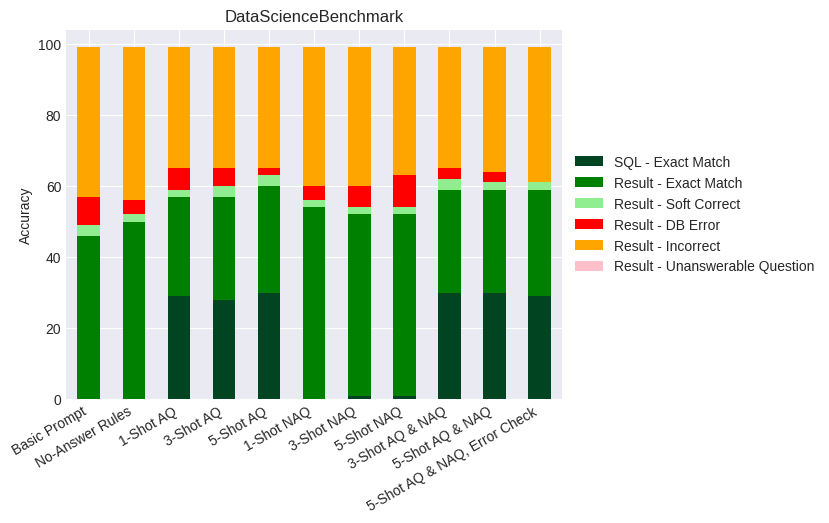

In [ ]:
import matplotlib.pyplot as plt

# Define specific colors for each column to be plotted
# colors = {
#     'sql exact match': '#014421',  # darker green
#     'result exact match': 'green',
#     'soft correct': 'lightgreen',
#     'db error': 'red',
#     'incorrect result': 'orange',
#     'unanswerable questions': 'pink',
# }

rename_cols_acc = {'sql exact match': 'SQL - Exact Match',
                                    'result exact match': 'Result - Exact Match',
                                    'soft correct': 'Result - Soft Correct',
                                    'db error': 'Result - DB Error',
                                    'incorrect result': 'Result - Incorrect',
                                    'unanswerable questions': 'Result - Unanswerable Question'}
# Update colors to use new column names
colors = {
    'SQL - Exact Match': '#014421',  # darker green
    'Result - Exact Match': 'green',
    'Result - Soft Correct': 'lightgreen',
    'Result - DB Error': 'red',
    'Result - Incorrect': 'orange',
    'Result - Unanswerable Question': 'pink',
}

df_accuracy_results.rename(columns=rename_cols_acc, inplace=True)

cols_to_plot = [col for col in colors.keys() if col in rename_cols_acc.values()] 

ax = df_accuracy_results[cols_to_plot].plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in cols_to_plot]
)

plt.ylabel('Accuracy')
plt.title('OncoMx Dev')
# plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


fig = ax.get_figure()
fig.savefig("figures/ScienceBenchmarkAcc.png", bbox_inches='tight', dpi=300)

eval qunans

In [26]:
import pandas as pd
from src import evalutation_per_question
import os

In [41]:
df_quna = pd.read_csv('data/addtional/unanswerable_questions.csv', sep='\t')

df_quna_dict = df_quna.set_index('question').T.to_dict('list')


In [42]:
main_folder = "results/Qunans"
data = {
    'Basic Prompt (schema in system prompt)' : f"{main_folder}/qunans_base_schema_in_systemprompt.jsonl",
    'dna Qunans rules':     f"{main_folder}/qunans_dna.jsonl",
    'one-shot answerable':  f"{main_folder}/qunans_fs_seed1.jsonl",
    'three-shot answerable':f"{main_folder}/qunans_fs_seed3.jsonl",
    'five-shot answerable': f"{main_folder}/qunans_fs_seed5.jsonl",
    'one-shot unanswerable':f"{main_folder}/qunans_fs_quna1.jsonl",
    'three-shot unanswerable':f"{main_folder}/qunans_fs_quna3.jsonl",
    'five-shot unanswerable':f"{main_folder}/qunans_fs_quna5.jsonl",
    '3 seed 3 quna':f"{main_folder}/qunans_fs_quna3_seed3.jsonl",
    '5 seed 5 quna':f"{main_folder}/qunans_fs_quna5_seed5.jsonl",
    '5 seed 5 quna check error':f"{main_folder}/qunans_fs_quna5_seed5_check_error.jsonl"
}

all_results_quna = {}
all_results_grouped = {}
res_folder = "results/Qunans/"
for name, path in data.items():
    
    res_path = res_folder + name + ".csv"
   
    df_res = pd.read_csv(res_path, index_col=0)

        
    #per category get accuracy 
    df_res['category'] = df_res['category'].str.strip()

    acc_group = df_res.groupby('category')['res_bool'].sum()
    all_results_grouped[name] = acc_group
    
    accuracy = sum(df_res['res_bool']) / len(df_res['res_bool'])
    print(f"Accuracy for {name}: {accuracy:.2%}")
    
    all_results_quna[name] = {'accuracy': accuracy}
    


Accuracy for Basic Prompt (schema in system prompt): 0.00%
Accuracy for dna Qunans rules: 35.00%
Accuracy for one-shot answerable: 48.75%
Accuracy for three-shot answerable: 50.00%
Accuracy for five-shot answerable: 51.25%
Accuracy for one-shot unanswerable: 42.50%
Accuracy for three-shot unanswerable: 48.75%
Accuracy for five-shot unanswerable: 60.00%
Accuracy for 3 seed 3 quna: 77.50%
Accuracy for 5 seed 5 quna: 77.50%
Accuracy for 5 seed 5 quna check error: 76.25%


In [43]:
df_quna_categories = pd.DataFrame.from_dict(all_results_grouped, orient='index')
df_quna = pd.DataFrame.from_dict(all_results_quna, orient='index')

df_quna['dataset'] = 'Qunans'

df_quna

,accuracy,dataset
Basic Prompt (schema in system prompt),0.0000,Qunans
dna Qunans rules,0.3500,Qunans
one-shot answerable,0.4875,Qunans
three-shot answerable,0.5000,Qunans
five-shot answerable,0.5125,Qunans
one-shot unanswerable,0.4250,Qunans
three-shot unanswerable,0.4875,Qunans
five-shot unanswerable,0.6000,Qunans
3 seed 3 quna,0.7750,Qunans
5 seed 5 quna,0.7750,Qunans


In [44]:
df_quna_categories_percentage = df_quna_categories / 10

In [45]:
df_quna_categories_percentage.rename(index=rename_experiments, inplace=True)
df_quna_categories_percentage

,Column Ambiguous,Columns Missing,Contextual Ambiguous,Non-SQL Questions,Operator Ambiguous,Out of Domain,Value Ambiguous,Value Missing
Basic Prompt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
No-Answer Rules,0.0,0.6,0.5,0.6,0.1,0.6,0.1,0.3
1-Shot AQ,0.1,0.7,0.8,0.9,0.3,0.7,0.1,0.3
3-Shot AQ,0.1,0.8,0.8,0.8,0.4,0.7,0.1,0.3
5-Shot AQ,0.1,0.8,0.8,0.9,0.4,0.7,0.1,0.3
1-Shot NAQ,0.0,0.7,0.6,0.7,0.4,0.7,0.1,0.2
3-Shot NAQ,0.1,0.7,0.7,0.8,0.3,0.7,0.4,0.2
5-Shot NAQ,0.0,1.0,0.8,0.9,0.4,0.8,0.5,0.4
3-Shot AQ & NAQ,0.3,1.0,1.0,1.0,0.8,0.8,0.8,0.5
5-Shot AQ & NAQ,0.2,1.0,1.0,1.0,0.9,0.9,0.7,0.5


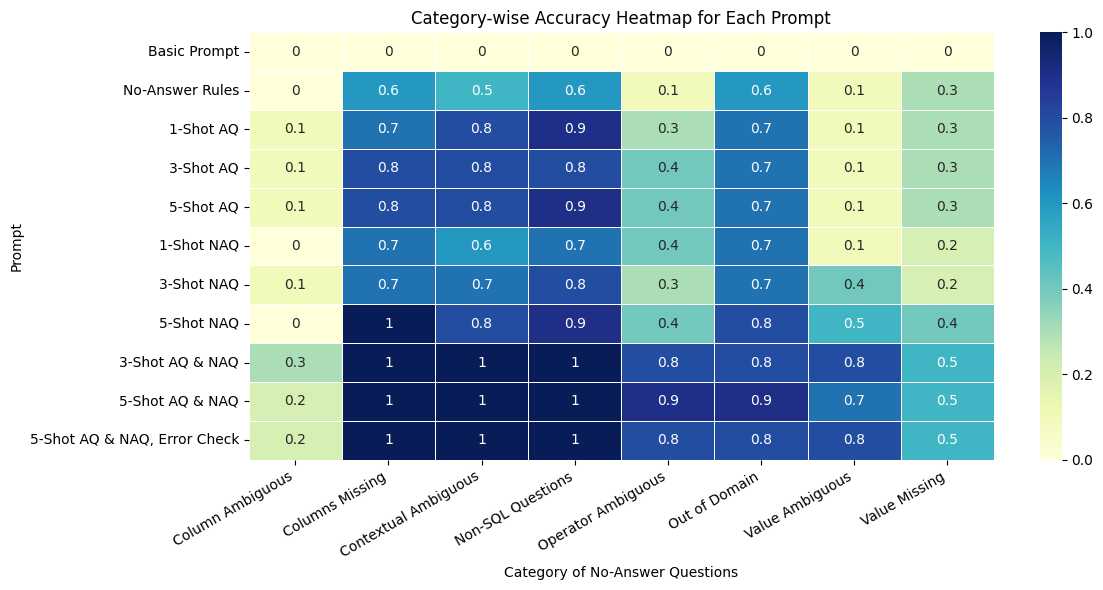

In [48]:
import seaborn as sns

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.heatmap(df_quna_categories_percentage, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Category-wise Accuracy Heatmap for Each Prompt')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Prompt')
plt.xlabel('Category of No-Answer Questions')
plt.tight_layout()
plt.show()

## Visualiue combined results

In [59]:
df_quna.rename(index=rename_experiments, inplace=True)

In [130]:
df_combined = pd.concat([df_accuracy_results[['dataset','accuracy']], df_quna[['dataset','accuracy']]], axis=0)
df_combined

df_combined.rename(columns={'dataset': 'Dataset'}, inplace=True)

In [131]:
df_grouped = df_combined.pivot_table(index=df_combined.index, columns='Dataset', values='accuracy')
df_grouped

Dataset,OncoMx Dev,Qunans
1-Shot AQ,0.595960,0.4875
1-Shot NAQ,0.565657,0.4250
3-Shot AQ,0.606061,0.5000
3-Shot AQ & NAQ,0.626263,0.7750
3-Shot NAQ,0.545455,0.4875
5-Shot AQ,0.636364,0.5125
5-Shot AQ & NAQ,0.616162,0.7750
"5-Shot AQ & NAQ, Error Check",0.616162,0.7625
5-Shot NAQ,0.545455,0.6000
Basic Prompt,0.494949,0.0000


In [132]:
df_grouped = df_combined.pivot_table(index=df_combined.index, columns='Dataset', values='accuracy')
df_grouped

# Rename the index for nicer display
# df_grouped.rename(index={
#     '3 seed 3 quna': '3-shot (seed=3, quna=3)',
#     'Basic Prompt (schema in system prompt)': 'Basic (schema in system)',
#     'Basic Prompt (schema in user prompt)': 'Basic (schema in user)',
#     'dna Qunans rules': 'Qunans rules',
#     'one-shot answerable': '1-shot answerable',
#     'three-shot answerable': '3-shot answerable',
#     'five-shot answerable': '5-shot answerable',
#     'one-shot unanswerable': '1-shot unanswerable',
#     'three-shot unanswerable': '3-shot unanswerable',
#     'five-shot unanswerable': '5-shot unanswerable',
#     '5 seed 5 quna': '5-shot (seed=5, quna=5)',
#     '5 seed 5 quna check error': '5-shot (seed=5, quna=5) check error'
# }, inplace=True)

# # Reorder the index to match the order in the rename mapping
# order = [
#     'Basic (schema in user)',
#     'Basic (schema in system)',
#     'Qunans rules',
#     '1-shot answerable',
#     '3-shot answerable',
#     '5-shot answerable',
#     '1-shot unanswerable',
#     '3-shot unanswerable',
#     '5-shot unanswerable',
#     '3-shot (seed=3, quna=3)',
#     '5-shot (seed=5, quna=5)',
#     '5-shot (seed=5, quna=5) check error'
# ]
order = rename_experiments.values()
df_grouped = df_grouped.reindex(order)
df_grouped

Dataset,OncoMx Dev,Qunans
Basic Prompt,0.494949,0.0000
No-Answer Rules,0.525253,0.3500
1-Shot AQ,0.595960,0.4875
3-Shot AQ,0.606061,0.5000
5-Shot AQ,0.636364,0.5125
1-Shot NAQ,0.565657,0.4250
3-Shot NAQ,0.545455,0.4875
5-Shot NAQ,0.545455,0.6000
3-Shot AQ & NAQ,0.626263,0.7750
5-Shot AQ & NAQ,0.616162,0.7750


In [ ]:
df_grouped.rename(index=rename_experiments, inplace=True)
df_grouped.rename(columns={'Qunans': 'OncoMx NAQ', 'dataset': 'Dataset'}, inplace=True)

Index(['OncoMx Dev', 'OncoMx NAQ'], dtype='object', name='Dataset')

In [134]:
import plotly.express as px

fig = px.bar(
    df_grouped,
    x=df_grouped.index,
    y=df_grouped.columns,
    barmode='group',
    title="Accuracy of Different Methods",
)
fig.update_yaxes(range=[0, 1])
fig.update_layout(
    width=900,
    height=800,
    font=dict(size=18)
)

fig.write_html("accuracy_of_methods.html")

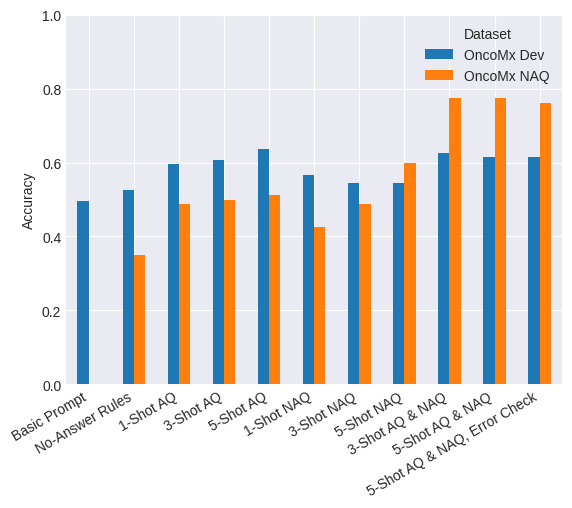

In [136]:
df_grouped.plot(kind='bar', )
plt.style.use('seaborn-v0_8-darkgrid')

plt.ylabel('Accuracy')
# plt.title('Accuracy by Dataset')
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.savefig("figures/Combined_res.png", bbox_inches='tight', dpi=300)

plt.show()


In [81]:
df_grouped.round(4) * 100

dataset,OncoMx Dev,Qunans
Basic (schema in user),49.49,NaN
Basic (schema in system),49.49,0.00
Qunans rules,52.53,35.00
1-shot answerable,59.60,48.75
3-shot answerable,60.61,50.00
5-shot answerable,63.64,51.25
1-shot unanswerable,56.57,42.50
3-shot unanswerable,54.55,48.75
5-shot unanswerable,54.55,60.00
"3-shot (seed=3, quna=3)",62.63,77.50
